In [ ]:
!gdown 1lubG2MHnCQ0j-PnrhkU3NN7f0tuLViIS -O "/content/dataset.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1lubG2MHnCQ0j-PnrhkU3NN7f0tuLViIS
From (redirected): https://drive.google.com/uc?id=1lubG2MHnCQ0j-PnrhkU3NN7f0tuLViIS&confirm=t&uuid=1faeb6d8-5d4c-4841-8eb1-c17784ac64cf
To: /content/dataset.zip
100% 147M/147M [00:03<00:00, 48.8MB/s]


In [ ]:
!unzip -o "/content/dataset.zip" -d "/content"

Archive:  /content/dataset.zip
  inflating: /content/dictionary.html  
  inflating: /content/flights_sample_3m.csv  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/flights_sample_3m.csv")

In [ ]:
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [ ]:
len(pd.concat([df['ORIGIN'], df['DEST']], axis=0).unique())

380

In [ ]:
pd.concat([df['ORIGIN'], df['DEST']], axis=0).value_counts().head(10)

,count
ATL,299116
DFW,256004
ORD,240831
DEN,235608
CLT,185639
LAX,168983
PHX,149178
LAS,145755
SEA,140385
IAH,121667


In [ ]:
top_delayed_due_weather = df['DELAY_DUE_WEATHER'].sort_values().dropna()

In [ ]:
top_delayed_due_weather.tail()

,DELAY_DUE_WEATHER
2794221,1416.0
2439973,1439.0
2718703,1459.0
1554797,1486.0
1476632,1653.0


In [ ]:
top_delayed_due_weather.describe()

,DELAY_DUE_WEATHER
count,533863.000000
mean,3.985260
std,32.410796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1653.000000


In [ ]:
len(top_delayed_due_weather[top_delayed_due_weather > 0])/len(top_delayed_due_weather)

0.05886903568893143

In [ ]:
round(df['CANCELLED'].mean(), 3)

np.float64(0.026)

In [ ]:
data = top_delayed_due_weather.values
data

array([   0.,    0.,    0., ..., 1459., 1486., 1653.])

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Задержки рейсов по погодным условиям')

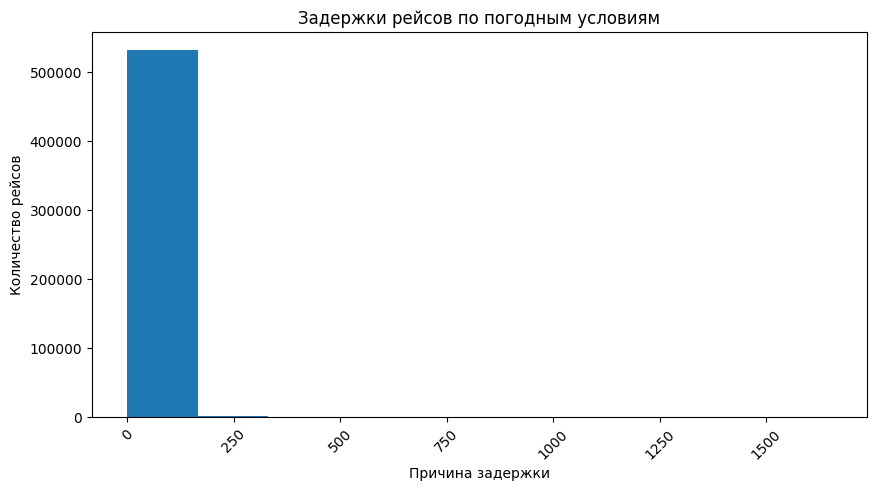

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(data)
plt.xticks(rotation=45)
plt.xlabel("Причина задержки")
plt.ylabel("Количество рейсов")
plt.title("Задержки рейсов по погодным условиям")

In [ ]:
info_of_delayed_for_weather_more_1000 = df[df['DELAY_DUE_WEATHER'] >= 1000]

In [ ]:
info_of_delayed_for_weather_more_1000

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
5147,2021-02-01,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2228,CLT,"Charlotte, NC",EWR,"Newark, NJ",...,0.0,117.0,122.0,76.0,529.0,0.0,1180.0,5.0,0.0,0.0
36942,2019-04-18,ExpressJet Airlines LLC d/b/a aha!,ExpressJet Airlines LLC d/b/a aha!: EV,EV,20366,4023,MOB,"Mobile, AL",IAH,"Houston, TX",...,0.0,101.0,100.0,79.0,427.0,0.0,1080.0,0.0,0.0,36.0
61175,2019-06-29,Mesa Airlines Inc.,Mesa Airlines Inc.: YV,YV,20378,6339,LGA,"New York, NY",IAH,"Houston, TX",...,0.0,248.0,220.0,184.0,1416.0,0.0,1092.0,0.0,0.0,0.0
62916,2022-08-04,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,744,SAN,"San Diego, CA",LAS,"Las Vegas, NV",...,0.0,83.0,100.0,50.0,258.0,0.0,1230.0,17.0,0.0,0.0
99703,2021-12-15,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1184,SLC,"Salt Lake City, UT",MSP,"Minneapolis, MN",...,0.0,154.0,157.0,123.0,991.0,0.0,1094.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902694,2019-10-05,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3968,MSP,"Minneapolis, MN",DLH,"Duluth, MN",...,0.0,59.0,42.0,31.0,144.0,0.0,1175.0,0.0,0.0,0.0
2945619,2022-02-03,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,5043,JFK,"New York, NY",CLE,"Cleveland, OH",...,0.0,123.0,104.0,85.0,425.0,0.0,1101.0,0.0,0.0,0.0
2969696,2022-07-31,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3656,ABQ,"Albuquerque, NM",SLC,"Salt Lake City, UT",...,0.0,105.0,100.0,80.0,493.0,0.0,1225.0,0.0,0.0,0.0
2973871,2022-11-13,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3699,SBN,"South Bend, IN",ATL,"Atlanta, GA",...,0.0,127.0,97.0,74.0,566.0,0.0,1112.0,0.0,0.0,0.0


**КООРДИНАТЫ**

In [ ]:
if 'origin_latitude' in df.columns:
  print("У вас уже есть координаты. Уверены, что стоит перезаписать?")
  print("Советуем скип до след. раздела")

In [ ]:
!gdown 1fd41g1Oil2fhmQIc9sn3uCvhlezdD7i0 -O "/content/origin_airport_coordinates.csv"

Downloading...
From: https://drive.google.com/uc?id=1fd41g1Oil2fhmQIc9sn3uCvhlezdD7i0
To: /content/origin_airport_coordinates.csv
100% 10.6k/10.6k [00:00<00:00, 19.0MB/s]


In [ ]:
origin_coordinates_df = pd.read_csv('/content/origin_airport_coordinates.csv')

In [ ]:
!gdown 1mjuXHwjZ4SKkCL9WlzXEN_I5J_lkOqh2 -O "/content/dest_airport_coordinates.csv"

Downloading...
From: https://drive.google.com/uc?id=1mjuXHwjZ4SKkCL9WlzXEN_I5J_lkOqh2
To: /content/dest_airport_coordinates.csv
100% 10.5k/10.5k [00:00<00:00, 21.9MB/s]


In [ ]:
dest_coordinates_df = pd.read_csv('/content/dest_airport_coordinates.csv')

In [ ]:
origin_coordinates_df.drop(columns=['Unnamed: 0'], inplace=True)
dest_coordinates_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df = df.merge(origin_coordinates_df, on="ORIGIN", how="inner")
df = df.merge(dest_coordinates_df, on="DEST", how="inner")

In [ ]:
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.122310,-80.143380,40.735660,-74.172370
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,44.979970,-93.263840,47.447567,-122.308016
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,39.739150,-104.984700,44.979970,-93.263840
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,44.979970,-93.263840,37.774930,-122.419420
4,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,44.636201,-63.591996,35.384805,-97.605344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868118,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,328.0,NaN,NaN,NaN,NaN,NaN,45.168363,3.616885,35.227090,-80.843130
2868119,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,977.0,NaN,NaN,NaN,NaN,NaN,41.603338,-98.926213,-34.450542,140.582238
2868120,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,151.0,0.0,36.0,0.0,0.0,0.0,34.730370,-86.586100,33.749000,-84.387980
2868121,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,184.0,NaN,NaN,NaN,NaN,NaN,42.363177,-71.013640,37.132581,-8.455051


In [ ]:
import requests

In [ ]:
# Функция для получения координат аэропорта по коду
def get_airport_coordinates(airport_code):
    if airport_code in cache:
        return cache[airport_code]

    print(f"Searching code {airport_code} by API")
    url = f"https://api.aviationapi.com/v1/airports?apt={airport_code}"
    response = requests.get(url)

    if response.status_code == 200:
        airport_data = response.json()
        # Проверяем, что координаты есть
        if 'location' in airport_data and airport_data['location']:
            lat = airport_data['location'].get('lat')
            lon = airport_data['location'].get('lon')

            cache[airport_code] = (lat, lon)
            return lat, lon

    cache[airport_code] = (None, None)
    return None, None

In [ ]:
# Функция для получения координат из csv или API
def get_coordinates(airport_code):
    # Проверяем, есть ли координаты в CSV
    coords = coordinates_df[coordinates_df['ORIGIN'] == airport_code]
    if not coords.empty:
        return coords['Latitude'].values[0], coords['Longitude'].values[0]
    # Если не нашли в CSV, используем API
    return get_airport_coordinates(airport_code)

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
cache = {}

# Не стоит запускать повторно
# Найдите файл с готовым
if not 'Latitude' in df.columns:
  df[['Latitude', 'Longitude']] = df['ORIGIN'].progress_apply(lambda x: pd.Series(get_coordinates(x)))
df

  0%|          | 6/3000000 [00:00<21:57:46, 37.94it/s]

Searching code MCO by API


  0%|          | 779/3000000 [00:00<29:42, 1682.23it/s]

Searching code MLI by API


  0%|          | 1361/3000000 [00:00<27:19, 1828.78it/s]

Searching code BGR by API


  0%|          | 7797/3000000 [00:03<24:24, 2043.45it/s]

Searching code COD by API


  0%|          | 8343/3000000 [00:03<21:28, 2321.51it/s]

Searching code LWB by API
Searching code MEI by API
Searching code SAF by API
Searching code CYS by API


  0%|          | 8804/3000000 [00:04<51:07, 975.04it/s]

Searching code ABR by API
Searching code LCK by API


  0%|          | 9218/3000000 [00:05<1:46:00, 470.23it/s]

Searching code RKS by API
Searching code GCK by API


  0%|          | 9420/3000000 [00:06<1:38:09, 507.78it/s]

Searching code LWS by API
Searching code EAR by API


  0%|          | 9504/3000000 [00:06<1:36:50, 514.64it/s]

Searching code GTR by API
Searching code CSG by API


  0%|          | 9769/3000000 [00:06<1:29:38, 555.97it/s]

Searching code RFD by API
Searching code ADQ by API


  0%|          | 9931/3000000 [00:07<1:35:48, 520.15it/s]

Searching code BLV by API
Searching code TYR by API


  0%|          | 10317/3000000 [00:07<52:03, 957.16it/s]  

Searching code CMX by API
Searching code PAH by API


  0%|          | 10550/3000000 [00:07<1:09:40, 715.01it/s]

Searching code JST by API
Searching code TOL by API


  0%|          | 10763/3000000 [00:08<1:22:41, 602.45it/s]

Searching code PSG by API


  0%|          | 10973/3000000 [00:08<1:06:51, 745.07it/s]

Searching code MHK by API
Searching code YKM by API


  0%|          | 11428/3000000 [00:08<52:40, 945.63it/s]

Searching code EAT by API
Searching code SPI by API


  0%|          | 11746/3000000 [00:09<56:39, 878.91it/s]

Searching code BQK by API
Searching code TWF by API


  0%|          | 12195/3000000 [00:09<1:04:00, 777.87it/s]

Searching code PUB by API
Searching code DEC by API


  0%|          | 12565/3000000 [00:10<58:32, 850.58it/s]  

Searching code HHH by API
Searching code PLN by API


  0%|          | 13151/3000000 [00:10<46:30, 1070.17it/s]

Searching code HIB by API
Searching code GUC by API


  0%|          | 13868/3000000 [00:11<38:27, 1294.11it/s]

Searching code ITH by API
Searching code OME by API


  0%|          | 14583/3000000 [00:11<32:39, 1523.95it/s]

Searching code MBS by API


  1%|          | 15100/3000000 [00:11<32:13, 1543.92it/s]

Searching code BFM by API


  1%|          | 16589/3000000 [00:12<28:19, 1755.30it/s]

Searching code LYH by API
Searching code RHI by API


  1%|          | 17718/3000000 [00:13<27:29, 1807.56it/s]

Searching code ALW by API


  1%|          | 18311/3000000 [00:13<28:09, 1765.25it/s]

Searching code DLG by API


  1%|          | 20735/3000000 [00:14<27:40, 1794.37it/s]

Searching code ALS by API


  1%|          | 20942/3000000 [00:14<35:38, 1392.78it/s]

Searching code MMH by API
Searching code XWA by API


  1%|          | 21323/3000000 [00:15<46:43, 1062.60it/s]

Searching code SPN by API


  1%|          | 22049/3000000 [00:15<35:31, 1396.89it/s]

Searching code MVY by API
Searching code ERI by API


  1%|          | 22658/3000000 [00:16<33:36, 1476.61it/s]

Searching code PGV by API


  1%|          | 23168/3000000 [00:16<32:24, 1530.69it/s]

Searching code HGR by API
Searching code ATY by API


  1%|          | 24200/3000000 [00:17<30:13, 1641.05it/s]

Searching code SMX by API


  1%|          | 25122/3000000 [00:17<27:14, 1819.98it/s]

Searching code HVN by API


  1%|          | 26107/3000000 [00:17<19:04, 2599.24it/s]

Searching code CGI by API


  1%|          | 28230/3000000 [00:19<24:55, 1987.39it/s]

Searching code BKG by API
Searching code DIK by API


  1%|          | 31697/3000000 [00:20<22:04, 2240.49it/s]

Searching code AKN by API
Searching code RIW by API


  1%|          | 32525/3000000 [00:20<24:39, 2005.07it/s]

Searching code FLO by API
Searching code GUM by API


  1%|          | 35026/3000000 [00:21<19:11, 2575.71it/s]

Searching code EAU by API


  1%|          | 36515/3000000 [00:22<19:57, 2475.03it/s]

Searching code TBN by API


  1%|          | 37292/3000000 [00:23<27:26, 1799.06it/s]

Searching code HTS by API


  1%|▏         | 38516/3000000 [00:23<21:00, 2348.53it/s]

Searching code PSM by API


  1%|▏         | 39407/3000000 [00:23<21:01, 2347.52it/s]

Searching code EKO by API


  1%|▏         | 42295/3000000 [00:24<18:14, 2701.55it/s]

Searching code PUW by API


  1%|▏         | 43211/3000000 [00:25<20:51, 2362.78it/s]

Searching code FOD by API


  1%|▏         | 44684/3000000 [00:25<22:52, 2153.92it/s]

Searching code CDB by API


  2%|▏         | 45988/3000000 [00:26<24:01, 2049.74it/s]

Searching code WYS by API


  2%|▏         | 46434/3000000 [00:26<23:26, 2099.51it/s]

Searching code OTH by API
Searching code VCT by API


  2%|▏         | 50138/3000000 [00:28<23:08, 2124.90it/s]

Searching code PPG by API


  2%|▏         | 52722/3000000 [00:29<19:44, 2488.95it/s]

Searching code OGS by API


  2%|▏         | 63664/3000000 [00:32<19:45, 2477.57it/s]

Searching code ISN by API


  2%|▏         | 65365/3000000 [00:33<29:05, 1681.50it/s]

Searching code ART by API


  2%|▏         | 68187/3000000 [00:34<19:17, 2533.03it/s]

Searching code ILG by API


  3%|▎         | 87064/3000000 [00:42<20:54, 2321.93it/s]

Searching code OWB by API


  3%|▎         | 102352/3000000 [00:46<18:05, 2670.60it/s]

Searching code OGD by API


  4%|▍         | 131257/3000000 [00:57<20:34, 2323.53it/s]

Searching code STC by API


  5%|▍         | 142608/3000000 [01:02<29:29, 1615.24it/s]

Searching code UIN by API


  6%|▌         | 170327/3000000 [01:12<19:15, 2449.19it/s]

Searching code GST by API


 10%|▉         | 290558/3000000 [01:57<22:21, 2019.65it/s]

Searching code ADK by API


100%|██████████| 3000000/3000000 [19:42<00:00, 2537.39it/s]


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Latitude,Longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,26.122310,-80.143380
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,44.979970,-93.263840
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,39.739150,-104.984700
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,44.979970,-93.263840
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN,45.168363,3.616885
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN,41.603338,-98.926213
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0,34.730370,-86.586100
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN,42.363177,-71.013640


In [ ]:
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.122310,-80.143380,40.735660,-74.172370
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,44.979970,-93.263840,47.447567,-122.308016
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,39.739150,-104.984700,44.979970,-93.263840
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,44.979970,-93.263840,37.774930,-122.419420
4,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,44.636201,-63.591996,35.384805,-97.605344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868118,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,328.0,NaN,NaN,NaN,NaN,NaN,45.168363,3.616885,35.227090,-80.843130
2868119,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,977.0,NaN,NaN,NaN,NaN,NaN,41.603338,-98.926213,-34.450542,140.582238
2868120,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,151.0,0.0,36.0,0.0,0.0,0.0,34.730370,-86.586100,33.749000,-84.387980
2868121,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,184.0,NaN,NaN,NaN,NaN,NaN,42.363177,-71.013640,37.132581,-8.455051


In [ ]:
df.to_csv("/content/dataset_fly_delay_with_coordinates.csv")

In [ ]:
df[['origin_latitude', 'origin_longitude', 'FL_DATE']]

,FL_DATE,origin_latitude,origin_longitude
0,2019-01-09,26.122310,-80.143380
1,2022-11-19,44.979970,-93.263840
2,2022-07-22,39.739150,-104.984700
3,2023-03-06,44.979970,-93.263840
4,2019-07-31,44.636201,-63.591996
...,...,...,...
2868118,2022-11-13,45.168363,3.616885
2868119,2022-11-02,41.603338,-98.926213
2868120,2022-09-11,34.730370,-86.586100
2868121,2019-11-13,42.363177,-71.013640


Склеим координаты отправления и прибытия, чтоб собрать датасет всех аэропортов

In [ ]:
!gdown 1fd41g1Oil2fhmQIc9sn3uCvhlezdD7i0 -O "/content/dataset_origin_airports_coords.csv"

Downloading...
From: https://drive.google.com/uc?id=1fd41g1Oil2fhmQIc9sn3uCvhlezdD7i0
To: /content/dataset_origin_airports_coords.csv
100% 10.6k/10.6k [00:00<00:00, 19.8MB/s]


In [ ]:
df_origin_airports_coords = pd.read_csv("/content/dataset_origin_airports_coords.csv")
df_origin_airports_coords.drop(columns=['Unnamed: 0'], inplace=True)
df_origin_airports_coords.rename(columns={'ORIGIN': 'airport_code', 'origin_latitude': 'latitude', 'origin_longitude': 'longitude'}, inplace=True)
df_origin_airports_coords

,airport_code,latitude,longitude
0,FLL,26.122310,-80.143380
1,MSP,44.979970,-93.263840
2,DEN,39.739150,-104.984700
3,DAL,44.636201,-63.591996
4,DCA,38.852330,-77.037200
...,...,...,...
372,OGD,41.223000,-111.973830
373,STC,40.912552,-74.239851
374,UIN,39.935600,-91.409870
375,GST,58.422570,-135.709230


In [ ]:
df_origin_airports_coords.isna().any(axis=1).sum()

np.int64(0)

In [ ]:
!gdown 1mjuXHwjZ4SKkCL9WlzXEN_I5J_lkOqh2 -O "/content/dataset_destination_airports_coords.csv"

Downloading...
From: https://drive.google.com/uc?id=1mjuXHwjZ4SKkCL9WlzXEN_I5J_lkOqh2
To: /content/dataset_destination_airports_coords.csv
100% 10.5k/10.5k [00:00<00:00, 22.8MB/s]


In [ ]:
df_dest_airports_coords = pd.read_csv("/content/dataset_destination_airports_coords.csv")
df_dest_airports_coords.drop(columns=['Unnamed: 0'], inplace=True)
df_dest_airports_coords.rename(columns={'DEST': 'airport_code', 'dest_latitude': 'latitude', 'dest_longitude': 'longitude'}, inplace=True)
df_dest_airports_coords

,airport_code,latitude,longitude
0,EWR,40.735660,-74.172370
1,SEA,47.447567,-122.308016
2,MSP,44.979970,-93.263840
3,SFO,37.774930,-122.419420
4,DFW,32.895950,-97.037200
...,...,...,...
371,FLO,61.948667,7.025468
372,BFM,30.628120,-88.069210
373,CDB,55.205560,-162.724170
374,ART,39.402819,-87.155293


In [ ]:
df_dest_airports_coords.isna().any(axis=1).sum()

np.int64(0)

In [ ]:
df_all_airports_coords = pd.merge(
    df_origin_airports_coords, df_dest_airports_coords,
    on='airport_code', how='outer'
)

df_all_airports_coords['latitude'] = df_all_airports_coords['latitude_x'].fillna(df_all_airports_coords['latitude_y'])
df_all_airports_coords['longitude'] = df_all_airports_coords['longitude_x'].fillna(df_all_airports_coords['longitude_y'])

df_all_airports_coords = df_all_airports_coords[['airport_code', 'latitude', 'longitude']]
df_all_airports_coords

,airport_code,latitude,longitude
0,ABE,48.891946,2.245066
1,ABI,5.886683,8.032871
2,ABQ,35.084103,-106.650985
3,ABR,42.227681,13.854983
4,ABY,53.283995,0.116367
...,...,...,...
372,XNA,36.281940,-94.306940
373,XWA,42.950080,-81.883090
374,YAK,59.500814,-139.644081
375,YKM,46.602070,-120.505900


In [ ]:
df_all_airports_coords.to_csv("/content/dataset_all_airports_coords.csv")

**Погода**

In [ ]:
import pandas as pd

In [ ]:
!gdown 1PYcTPXlVgeFr5SrU_3y5LMcMyvImmnhu -O "/content/dataset_all_airports_coords.csv"

Downloading...
From: https://drive.google.com/uc?id=1PYcTPXlVgeFr5SrU_3y5LMcMyvImmnhu
To: /content/dataset_all_airports_coords.csv
100% 10.6k/10.6k [00:00<00:00, 20.9MB/s]


In [ ]:
df_all_airports_coords = pd.read_csv("/content/dataset_all_airports_coords.csv").drop(columns=['Unnamed: 0'])

In [ ]:
df_all_airports_coords

,airport_code,latitude,longitude
0,ABE,48.891946,2.245066
1,ABI,5.886683,8.032871
2,ABQ,35.084103,-106.650985
3,ABR,42.227681,13.854983
4,ABY,53.283995,0.116367
...,...,...,...
372,XNA,36.281940,-94.306940
373,XWA,42.950080,-81.883090
374,YAK,59.500814,-139.644081
375,YKM,46.602070,-120.505900


In [ ]:
!gdown 1lubG2MHnCQ0j-PnrhkU3NN7f0tuLViIS -O "/content/dataset.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1lubG2MHnCQ0j-PnrhkU3NN7f0tuLViIS
From (redirected): https://drive.google.com/uc?id=1lubG2MHnCQ0j-PnrhkU3NN7f0tuLViIS&confirm=t&uuid=debf6cc1-78b8-4c11-805e-5a319d902c91
To: /content/dataset.zip
100% 147M/147M [00:01<00:00, 76.0MB/s]


In [ ]:
!unzip -o "/content/dataset.zip" -d "/content"

Archive:  /content/dataset.zip
  inflating: /content/dictionary.html  
  inflating: /content/flights_sample_3m.csv  


In [ ]:
df = pd.read_csv("/content/flights_sample_3m.csv", parse_dates=['FL_DATE'])
df

In [ ]:
!gdown 1_gu2qHonE2EtO53bx-e6Lg91quoleUry -O "/content/dataset_fly_delay_with_coordinates.csv"

Downloading...
From (original): https://drive.google.com/uc?id=1_gu2qHonE2EtO53bx-e6Lg91quoleUry
From (redirected): https://drive.google.com/uc?id=1_gu2qHonE2EtO53bx-e6Lg91quoleUry&confirm=t&uuid=a5e420e2-c3de-49d0-a0e7-c2b14a6c17e1
To: /content/dataset_fly_delay_with_coordinates.csv
100% 696M/696M [00:07<00:00, 99.2MB/s]


In [ ]:
df_with_coords = pd.read_csv('/content/dataset_fly_delay_with_coordinates.csv', parse_dates=['FL_DATE'])
df_with_coords

,Unnamed: 0,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,...,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Latitude,Longitude
0,0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,...,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,26.122310,-80.143380
1,1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,...,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,44.979970,-93.263840
2,2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,...,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,39.739150,-104.984700
3,3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,...,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,44.979970,-93.263840
4,4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,...,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,...,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN,45.168363,3.616885
2999996,2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,...,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN,41.603338,-98.926213
2999997,2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,...,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0,34.730370,-86.586100
2999998,2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,...,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN,42.363177,-71.013640


In [ ]:
!pip install openmeteo_requests requests_cache retry_requests

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

In [ ]:
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

In [ ]:
# Функция для получения погодных данных
def get_weather_data_by_coords_list_on_5years(airport_codes: list, latitudes: list = [26.12231, 44.97997], longitudes: list = [-80.14338, -93.26384]):
    if len(airport_codes) != len(latitudes) or len(latitudes) != len(longitudes):
        raise ValueError("The number of airport codes, latitudes, and longitudes must be the same.")
    # Make sure all required weather variables are listed here
    # The order of variables in hourly or daily is important to assign them correctly below
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
      "latitude": latitudes,
      "longitude": longitudes,
      "start_date": "2019-01-01",
      "end_date": "2023-08-31",
      "hourly": ["temperature_2m", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "relative_humidity_2m", "snowfall", "rain", "precipitation", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "vapour_pressure_deficit", "is_day", "albedo", "snow_depth_water_equivalent"],
      "temporal_resolution": "hourly_6"
    }
    responses = openmeteo.weather_api(url, params=params)

    res = {}
    for code, response in zip(airport_codes, responses):
        print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

        # Process hourly data. The order of variables needs to be the same as requested.
        hourly = response.Hourly()
        hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
        hourly_wind_speed_10m = hourly.Variables(1).ValuesAsNumpy()
        hourly_wind_speed_100m = hourly.Variables(2).ValuesAsNumpy()
        hourly_wind_direction_10m = hourly.Variables(3).ValuesAsNumpy()
        hourly_wind_direction_100m = hourly.Variables(4).ValuesAsNumpy()
        hourly_wind_gusts_10m = hourly.Variables(5).ValuesAsNumpy()
        hourly_relative_humidity_2m = hourly.Variables(6).ValuesAsNumpy()
        hourly_snowfall = hourly.Variables(7).ValuesAsNumpy()
        hourly_rain = hourly.Variables(8).ValuesAsNumpy()
        hourly_precipitation = hourly.Variables(9).ValuesAsNumpy()
        hourly_pressure_msl = hourly.Variables(10).ValuesAsNumpy()
        hourly_surface_pressure = hourly.Variables(11).ValuesAsNumpy()
        hourly_cloud_cover = hourly.Variables(12).ValuesAsNumpy()
        hourly_cloud_cover_low = hourly.Variables(13).ValuesAsNumpy()
        hourly_cloud_cover_mid = hourly.Variables(14).ValuesAsNumpy()
        hourly_cloud_cover_high = hourly.Variables(15).ValuesAsNumpy()
        hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
        hourly_is_day = hourly.Variables(17).ValuesAsNumpy()
        hourly_albedo = hourly.Variables(18).ValuesAsNumpy()
        hourly_snow_depth_water_equivalent = hourly.Variables(19).ValuesAsNumpy()

        hourly_data = {"date": pd.date_range(
          start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
          end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
          freq = pd.Timedelta(seconds = hourly.Interval()),
          inclusive = "left"
        )}

        hourly_data["temperature_2m"] = hourly_temperature_2m
        hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
        hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
        hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
        hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
        hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
        hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
        hourly_data["snowfall"] = hourly_snowfall
        hourly_data["rain"] = hourly_rain
        hourly_data["precipitation"] = hourly_precipitation
        hourly_data["pressure_msl"] = hourly_pressure_msl
        hourly_data["surface_pressure"] = hourly_surface_pressure
        hourly_data["cloud_cover"] = hourly_cloud_cover
        hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
        hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
        hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
        hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
        hourly_data["is_day"] = hourly_is_day
        hourly_data["albedo"] = hourly_albedo
        hourly_data["snow_depth_water_equivalent"] = hourly_snow_depth_water_equivalent

        hourly_dataframe = pd.DataFrame(data = hourly_data)
        hourly_dataframe["airport_code"] = code
        hourly_dataframe["date"] = hourly_dataframe["date"].dt.tz_localize(None)
        res[code] = hourly_dataframe
    return res

In [ ]:
get_weather_data_by_coords_list_on_5years(['first_code', 'second_code'])

Coordinates 26.115991592407227°N -80.14239501953125°E
Elevation 4.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 44.95606231689453°N -93.20928955078125°E
Elevation 257.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


{'first_code':                     date  temperature_2m  wind_speed_10m  wind_speed_100m  \
 0    2019-01-01 00:00:00       23.556499        8.435069        16.831684   
 1    2019-01-01 06:00:00       23.756500       16.291740        27.497026   
 2    2019-01-01 12:00:00       23.156500       12.313894        23.333443   
 3    2019-01-01 18:00:00       25.456501       22.691423        30.106850   
 4    2019-01-02 00:00:00       23.856501        9.000000        18.345877   
 ...                  ...             ...             ...              ...   
 6811 2023-08-30 18:00:00       32.106499       30.752090        41.548428   
 6812 2023-08-31 00:00:00       27.306499       19.829433        32.023815   
 6813 2023-08-31 06:00:00       26.356501       12.819235        24.850431   
 6814 2023-08-31 12:00:00       25.506500        9.673221        20.746122   
 6815 2023-08-31 18:00:00       32.456501       14.400000        18.161278   
 
       wind_direction_10m  wind_direction_100m  

In [87]:
def aggregate_weather_data(weather_df):
    # Определяем временные интервалы
    time_mapping = {0: "night", 6: "morning", 12: "day", 18: "evening"}

    # Добавляем столбец с временным интервалом
    weather_df["time_of_day"] = weather_df["date"].dt.hour.map(time_mapping)

    # Убираем строки, если время не 00:00, 06:00, 12:00, 18:00
    weather_df = weather_df.dropna(subset=["time_of_day"])

    # Преобразуем дату в формат без времени (чтобы сгруппировать по дням)
    weather_df["date"] = weather_df["date"].dt.date

    # Разворачиваем данные: каждая метрика получает префикс времени суток
    weather_df = weather_df.pivot(index=["airport_code", "date"], columns="time_of_day")

    # Убираем лишнюю вложенность столбцов
    weather_df.columns = [f"{col_time}_{col_metric}" for col_metric, col_time in weather_df.columns]

    # Сбрасываем индекс, чтобы вернуть DataFrame в нормальный вид
    return weather_df.reset_index()

In [ ]:
def merge_flight_to_coords(df_flights, df_all_airports_coords=df_all_airports_coords):
    df_flights_with_coords = pd.merge(df_flights, df_all_airports_coords, left_on='ORIGIN', right_on='airport_code', how='inner')
    df_flights_with_coords.rename(columns={'latitude': 'origin_latitude', 'longitude': 'origin_longitude'}, inplace=True)
    df_flights_with_coords.drop(columns=['airport_code'], inplace=True)

    df_flights_with_coords = pd.merge(df_flights_with_coords, df_all_airports_coords, left_on='DEST', right_on='airport_code', how='inner')
    df_flights_with_coords.rename(columns={'latitude': 'dest_latitude', 'longitude': 'dest_longitude'}, inplace=True)
    df_flights_with_coords.drop(columns=['airport_code'], inplace=True)

    return df_flights_with_coords
merge_flight_to_coords(df)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.122310,-80.143380,40.735660,-74.172370
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,44.979970,-93.263840,47.447567,-122.308016
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,39.739150,-104.984700,44.979970,-93.263840
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,44.979970,-93.263840,37.774930,-122.419420
4,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,44.636201,-63.591996,35.384805,-97.605344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871828,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,328.0,NaN,NaN,NaN,NaN,NaN,45.168363,3.616885,35.227090,-80.843130
2871829,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,977.0,NaN,NaN,NaN,NaN,NaN,41.603338,-98.926213,-34.450542,140.582238
2871830,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,151.0,0.0,36.0,0.0,0.0,0.0,34.730370,-86.586100,33.749000,-84.387980
2871831,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,184.0,NaN,NaN,NaN,NaN,NaN,42.363177,-71.013640,37.132581,-8.455051


In [81]:
def add_weather_features(df_flights, weather_data):
    time_slots = ["night", "morning", "day", "evening"]

    weather_data['date'] = pd.to_datetime(weather_data['date'])
    weather_data['date'] = weather_data['date'].dt.date


    for prefix, airport_col in [("origin", "ORIGIN"), ("dest", "DEST")]:
        # Достаем соответствующий DataFrame погоды по airport_code
        df_flights = df_flights.merge(
            weather_data.rename(columns=lambda x: f"{prefix}_{x}"),
            left_on=[airport_col, "date"],
            right_on=[f"airport_code", f"{prefix}_date"],
            how="left"
        )

    return df_flights

In [ ]:
train_flights_df = pd.DataFrame(df.iloc[0]).T
train_flights_df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_flights_df_with_coords = merge_flight_to_coords(train_flights_df)
train_flights_df_with_coords

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.12231,-80.14338,40.73566,-74.17237


In [ ]:
train_flights_df_with_coords['origin_latitude'], train_flights_df_with_coords['origin_longitude']

(0    26.12231
 Name: origin_latitude, dtype: float64,
 0   -80.14338
 Name: origin_longitude, dtype: float64)

In [ ]:
train_weather = get_weather_data_by_coords_list_on_5years(train_flights_df['ORIGIN'].unique(), train_flights_df_with_coords['origin_latitude'], train_flights_df_with_coords['origin_longitude'])

Coordinates 26.115991592407227°N -80.14239501953125°E
Elevation 4.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


In [77]:
list(train_weather.values())[0]

,date,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,relative_humidity_2m,snowfall,rain,...,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,vapour_pressure_deficit,is_day,albedo,snow_depth_water_equivalent,airport_code
0,2019-01-01 00:00:00,23.556499,8.435069,16.831684,140.194473,138.468323,25.199999,90.202271,0.0,0.0,...,1020.829773,16.0,39.0,0.0,0.0,0.284508,0.0,NaN,NaN,FLL
1,2019-01-01 06:00:00,23.756500,16.291740,27.497026,135.000107,136.060822,29.160000,85.909904,0.0,0.2,...,1020.530273,55.0,55.0,0.0,0.0,0.414124,0.0,NaN,NaN,FLL
2,2019-01-01 12:00:00,23.156500,12.313894,23.333443,127.875046,128.107620,25.199999,88.531044,0.0,0.0,...,1021.029053,17.0,61.0,0.0,0.0,0.325128,0.0,NaN,NaN,FLL
3,2019-01-01 18:00:00,25.456501,22.691423,30.106850,131.784424,131.121384,45.360001,75.026703,0.0,0.9,...,1019.833130,52.0,52.0,0.0,0.0,0.812422,1.0,NaN,NaN,FLL
4,2019-01-02 00:00:00,23.856501,9.000000,18.345877,106.260277,105.945465,18.359999,82.049698,0.0,0.2,...,1021.130005,2.0,48.0,5.0,0.0,0.530788,0.0,NaN,NaN,FLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,2023-08-30 18:00:00,32.106499,30.752090,41.548428,207.164902,207.897186,61.199997,62.549389,0.0,1.2,...,1009.547974,95.0,30.0,16.0,93.0,1.789414,1.0,NaN,NaN,FLL
6812,2023-08-31 00:00:00,27.306499,19.829433,32.023815,195.802582,201.083832,36.360001,87.287949,0.0,0.6,...,1009.940491,62.0,7.0,22.0,99.0,0.460951,0.0,NaN,NaN,FLL
6813,2023-08-31 06:00:00,26.356501,12.819235,24.850431,218.157272,218.530212,23.400000,91.209084,0.0,0.3,...,1010.938843,51.0,3.0,1.0,49.0,0.301485,0.0,NaN,NaN,FLL
6814,2023-08-31 12:00:00,25.506500,9.673221,20.746122,224.999893,231.340179,20.160000,91.155777,0.0,0.0,...,1011.937012,61.0,8.0,23.0,80.0,0.288480,1.0,NaN,NaN,FLL


In [ ]:
add_weather_features(train_flights_df, weather_data)

KeyError: 'origin_airport_code'

In [94]:
def create_df_weather_for_every_flight(df_flights, df_all_airports_coords=df_all_airports_coords):
    unique_airports = pd.concat([df_flights['ORIGIN'], df_flights['DEST']], axis=0).unique()
    unique_airports_and_coords = df_all_airports_coords[df_all_airports_coords['airport_code'].isin(unique_airports)]
    df_weather_by_airport_code = get_weather_data_by_coords_list_on_5years(unique_airports['airport_codes'], unique_airports_and_coords['latitude'], unique_airports_and_coords['longitude'])
    return list(df_weather_by_airport_code)
    df_weather_by_airport_code = aggregate_weather_data(list(df_weather_by_airport_code.values()))
    res = []
    for airport_code, weather_df in df_weather_by_airport_code.items():
        weather_df['airport_code'] = airport_code
    df_weather = add_weather_features(df_flights, df_weather_by_airport_code.values())


    return df_weather
create_df_weather_for_every_flight(pd.DataFrame(df.iloc[0]).T, df_all_airports_coords)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
df_all_airports_coords

In [ ]:
create_df_weather_for_every_flight(df, df_all_airports_coords)

KeyError: "None of [Index(['latitude', 'longitude'], dtype='object')] are in the [columns]"

In [ ]:
df_all_airports_coords

,airport_code,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,ABE,48.891946,2.245066,48.891946,2.245066
1,ABI,5.886683,8.032871,5.886683,8.032871
2,ABQ,35.084103,-106.650985,35.084103,-106.650985
3,ABR,42.227681,13.854983,42.227681,13.854983
4,ABY,53.283995,0.116367,53.283995,0.116367
...,...,...,...,...,...
372,XNA,36.281940,-94.306940,36.281940,-94.306940
373,XWA,42.950080,-81.883090,42.950080,-81.883090
374,YAK,59.500814,-139.644081,59.500814,-139.644081
375,YKM,46.602070,-120.505900,46.602070,-120.505900


In [ ]:
COEF = 3

In [ ]:
# 1. Удаляем строки с NaN в столбце 'DELAY_DUE_WEATHER'
df_cleaned = df_with_coords.dropna(subset=['FL_DATE','ORIGIN', 'DEST', 'AIR_TIME', 'DELAY_DUE_WEATHER', 'CANCELLED', 'origin_latitude', 'origin_longitude', 'dest_latitude', 'dest_longitude'])

# 2. Убираем ненужные столбцы, оставляем только те, которые нам нужны для предсказания по погоде
columns_to_keep = ['FL_DATE','ORIGIN', 'DEST', 'AIR_TIME', 'DELAY_DUE_WEATHER', 'CANCELLED', 'origin_latitude', 'origin_longitude', 'dest_latitude', 'dest_longitude']
df_cleaned = df_cleaned[columns_to_keep]

# 3. Сбалансируем выборку по переносу рейсов
# Для начала создадим две выборки: с задержками по погодным условиям (DELAY_DUE_WEATHER > 0) и без них
delayed_flights = df_cleaned[df_cleaned['DELAY_DUE_WEATHER'] > 0]
on_time_flights = df_cleaned[df_cleaned['DELAY_DUE_WEATHER'] == 0]

# Берем случайную подвыборку с рейсами без задержек, чтобы их количество стало примерно равно количеству задержанных рейсов
on_time_flights_sample = on_time_flights.sample(round(len(delayed_flights)* COEF), random_state=42)

# Объединяем выборки
df_balanced = pd.concat([delayed_flights, on_time_flights_sample])

# Печатаем результат
print(f"Исходный размер датасета: {len(df)}")
print(f"Размер очищенного датасета: {len(df_cleaned)}")
print(f"Размер сбалансированного датасета: {len(df_balanced)}")

KeyError: ['origin_latitude', 'origin_longitude', 'dest_latitude', 'dest_longitude']

In [ ]:
sample_100k_for_weather = df_balanced.sample(100_000)

In [ ]:
sample_100k_for_weather

,FL_DATE,ORIGIN,DEST,AIR_TIME,DELAY_DUE_WEATHER,CANCELLED,origin_latitude,origin_longitude,dest_latitude,dest_longitude
2601641,2020-02-18,ATL,LGA,97.0,0.0,0.0,33.749000,-84.387980,37.132581,-8.455051
1937643,2022-07-19,ATL,FLL,87.0,0.0,0.0,33.749000,-84.387980,26.122310,-80.143380
1200744,2021-08-17,RSW,PHL,135.0,0.0,0.0,26.537310,-81.759970,10.495212,123.400404
1817997,2023-03-17,ATL,GSO,51.0,0.0,0.0,33.749000,-84.387980,36.072640,-79.791980
1023322,2021-06-14,LAS,SAN,43.0,0.0,0.0,20.017111,103.378253,32.733361,-117.192246
...,...,...,...,...,...,...,...,...,...,...
2416677,2019-04-05,ATL,MOB,53.0,3.0,0.0,33.749000,-84.387980,30.692692,-88.241339
156941,2023-04-10,SHV,DFW,39.0,0.0,0.0,32.525150,-93.750180,32.895950,-97.037200
2372564,2023-05-20,AUS,SLC,147.0,0.0,0.0,-34.450542,140.582238,40.760780,-111.891050
1491941,2019-07-29,MDW,ABQ,147.0,17.0,0.0,51.416670,0.500000,35.084103,-106.650985


In [ ]:
df_balanced['origin_latitude']

In [ ]:
all_weather_data_origin = get_weather_data(df_balanced['origin_latitude'],df_balanced['origin_longitude'])

Coordinates 33.77855682373047°N -84.40298461914062°E
Elevation 327.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 33.77855682373047°N -84.40298461914062°E
Elevation 327.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 26.537784576416016°N -81.76406860351562°E
Elevation 8.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 33.77855682373047°N -84.40298461914062°E
Elevation 327.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 19.999998092651367°N 103.32000732421875°E
Elevation 760.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 25.764497756958008°N -80.29409790039062°E
Elevation 2.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates 40.456939697265625°N -80.22564697265625°E
Elevation 347.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Coordinates -34.48154830932617°N 140.5541534423828°E
Elevation 36.0 m asl
Timezone NoneNone
Timezone difference to GMT

In [ ]:
pd.concat(data, )

In [ ]:
data[0]

,date,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,relative_humidity_2m,snowfall,rain,...,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,vapour_pressure_deficit,is_day,albedo,snow_depth_water_equivalent
0,2019-01-01 00:00:00+00:00,17.896500,18.448023,33.847656,174.400757,181.218842,42.480000,84.770828,0.0,0.800000,...,1016.500000,978.359680,71.0,100.0,38.0,76.0,0.312422,0.0,NaN,NaN
1,2019-01-01 06:00:00+00:00,17.646500,12.783802,24.514387,212.347412,209.953522,32.399998,97.815094,0.0,7.600000,...,1015.900024,977.750122,100.0,100.0,100.0,30.0,0.044117,0.0,NaN,NaN
2,2019-01-01 12:00:00+00:00,15.196500,4.334974,9.028754,318.366547,336.501404,17.280001,99.359459,0.0,9.500001,...,1018.500000,979.934875,100.0,100.0,16.0,98.0,0.011070,0.0,NaN,NaN
3,2019-01-01 18:00:00+00:00,16.846500,9.504272,12.387348,307.304016,305.537750,30.960001,85.206299,0.0,3.800000,...,1019.500000,981.111816,98.0,23.0,96.0,74.0,0.284053,1.0,NaN,NaN
4,2019-01-02 00:00:00+00:00,14.046500,3.706427,7.289445,299.054504,302.905243,15.840000,94.931877,0.0,1.600000,...,1021.400024,982.573730,100.0,0.0,99.0,98.0,0.081342,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,2023-08-30 18:00:00+00:00,24.446501,16.179985,22.596991,20.854538,22.479481,34.200001,84.674950,0.0,1.700000,...,1006.000000,969.065979,100.0,0.0,9.0,100.0,0.469412,1.0,NaN,NaN
6812,2023-08-31 00:00:00+00:00,22.696501,9.227524,16.375053,290.556122,303.340729,19.440001,96.124504,0.0,3.300000,...,1006.400024,969.237610,82.0,25.0,100.0,54.0,0.106842,1.0,NaN,NaN
6813,2023-08-31 06:00:00+00:00,19.996500,10.805998,21.794127,330.018433,337.671295,17.280001,88.547585,0.0,2.400000,...,1008.599976,971.020996,4.0,1.0,3.0,0.0,0.267743,0.0,NaN,NaN
6814,2023-08-31 12:00:00+00:00,19.246500,7.421590,10.883676,320.906128,325.784241,12.240000,93.646545,0.0,0.000000,...,1011.000000,973.237366,30.0,2.0,0.0,0.0,0.141785,1.0,NaN,NaN


In [ ]:
import json
json_list = [df.astype({"date": str}).to_dict(orient="records") for df in data]

In [ ]:
with open('/content/weather_by_sample_100.json', 'w', encoding="utf-8") as f:
    json.dump(json_list, f, indent=4)

## Модельки (надо пофиксить координаты и погоду)

In [ ]:
import json
import pandas as pd

In [ ]:
!gdown 1ARflrPrvWb2MgJ7PbmNBpLMOMnQHHboD -O "/content/weather_by_sample_100.json"

Downloading...
From (original): https://drive.google.com/uc?id=1ARflrPrvWb2MgJ7PbmNBpLMOMnQHHboD
From (redirected): https://drive.google.com/uc?id=1ARflrPrvWb2MgJ7PbmNBpLMOMnQHHboD&confirm=t&uuid=10136152-6277-4e3e-9cb4-b573614fffaf
To: /content/weather_by_sample_100.json
100% 631M/631M [00:09<00:00, 66.6MB/s]


In [ ]:
with open("/content/weather_by_sample_100.json", "r", encoding="utf-8") as f:
    json_list = json.load(f)

# Преобразуем каждый элемент в DataFrame и объединяем их в один
dfs = [pd.DataFrame(data) for data in json_list]
combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_df

,date,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,relative_humidity_2m,snowfall,rain,precipitation,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,vapour_pressure_deficit,is_day
0,2019-01-01 00:00:00+00:00,17.896500,18.448023,33.847656,174.400757,181.218842,42.480000,84.770828,0.0,0.800000,0.800000,1016.500000,978.359680,71.0,100.0,38.0,76.0,0.312422,0.0
1,2019-01-01 06:00:00+00:00,17.646500,12.783802,24.514387,212.347412,209.953522,32.399998,97.815094,0.0,7.600000,7.600000,1015.900024,977.750122,100.0,100.0,100.0,30.0,0.044117,0.0
2,2019-01-01 12:00:00+00:00,15.196500,4.334974,9.028754,318.366547,336.501404,17.280001,99.359459,0.0,9.500001,9.500001,1018.500000,979.934875,100.0,100.0,16.0,98.0,0.011070,0.0
3,2019-01-01 18:00:00+00:00,16.846500,9.504272,12.387348,307.304016,305.537750,30.960001,85.206299,0.0,3.800000,3.800000,1019.500000,981.111816,98.0,23.0,96.0,74.0,0.284053,1.0
4,2019-01-02 00:00:00+00:00,14.046500,3.706427,7.289445,299.054504,302.905243,15.840000,94.931877,0.0,1.600000,1.600000,1021.400024,982.573730,100.0,0.0,99.0,98.0,0.081342,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681595,2023-08-30 18:00:00+00:00,28.771000,15.192682,19.386591,193.706985,195.068542,30.960001,40.091976,0.0,0.000000,0.000000,1015.000000,946.251038,0.0,0.0,0.0,0.0,2.367700,1.0
681596,2023-08-31 00:00:00+00:00,27.971001,21.995380,33.927967,158.895081,160.795929,37.439999,41.056549,0.0,0.000000,0.000000,1011.200012,942.533936,0.0,0.0,0.0,0.0,2.223967,1.0
681597,2023-08-31 06:00:00+00:00,21.721001,23.210928,39.649059,156.217957,159.261215,38.880001,57.336113,0.0,0.000000,0.000000,1011.799988,941.698181,7.0,0.0,0.0,7.0,1.109254,0.0
681598,2023-08-31 12:00:00+00:00,19.071001,21.749481,37.114933,167.574066,171.634201,36.360001,63.235493,0.0,0.000000,0.000000,1012.799988,942.019531,6.0,0.0,0.0,6.0,0.811871,0.0


In [ ]:
combined_df.drop(columns=['albedo', 'snow_depth_water_equivalent'], inplace=True, axis=1)

In [ ]:
!pip install numpy==1.24.3
!pip install scikit-learn
!pip uninstall -y catboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3

Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)


In [ ]:
import pandas as pd
import numpy as np
import requests
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from datetime import datetime
from tqdm import tqdm
import torch

In [ ]:
# Кодирование категориальных признаков
le = LabelEncoder()
combined_df['ORIGIN'] = le.fit_transform(combined_df['ORIGIN'])
combined_df['DEST'] = le.fit_transform(combined_df['DEST'])

KeyError: 'ORIGIN'

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = df[['ORIGIN', 'DEST', 'CARRIER', 'Latitude', 'Longitude']]
y = df['DELAY_DUE_WEATHER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Обучение и оценка нескольких моделей
models = {
    "LinearRegression": LinearRegression(),
    "LassoCV": LassoCV(cv=5),
    "RidgeCV": RidgeCV(cv=5),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(n_estimators=100, random_state=42),
    "CatBoostRegressor": CatBoostRegressor(verbose=0, iterations=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2": r2, "RMSE": rmse}
    print(f"{name}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

In [ ]:
# Визуализация результатов
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=[res["R2"] for res in results.values()])
plt.title("Оценка R2 для различных моделей")
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=[res["RMSE"] for res in results.values()])
plt.title("Оценка RMSE для различных моделей")
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.show()

In [ ]:
# Диаграмма рассеяния
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_pred = predictions[best_model_name]
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=best_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Диаграмма рассеяния для {best_model_name}")
plt.show()

In [ ]:
# Сохранение лучшей модели
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]
with open("flight_delay_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Лучшая модель: {best_model_name}")